<a href="https://colab.research.google.com/github/AkhilPadma/Polymembrane-design-for-gases-separation-using-Machine-Learning/blob/main/Gas_sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.activations import gelu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 53.4 MB/s eta 0:00:00


In [2]:
# Load the N2 permeability data
file_path = '/content/N2_permeability_data_with_references_input_728.csv'
data = pd.read_csv(file_path)



In [3]:
# Convert SMILES to RDKit fingerprints
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
        return list(fp)
    else:
        return [0] * 1024  # Return a zero vector for invalid SMILES



In [4]:
data['Fingerprint'] = data['SMILES'].apply(smiles_to_fingerprint)
X = pd.DataFrame(data['Fingerprint'].tolist())  # Convert fingerprints into a DataFrame format

data['Log10_N2_permeability'] = np.log10(data['N2 permeability (barrer)'])
y = data['Log10_N2_permeability'].dropna()
X_cleaned = X.loc[y.index]  # Ensure X matches y indices



[05:30:21] DEPRECATION WARNING: please use MorganGenerator
[05:30:21] DEPRECATION WARNING: please use MorganGenerator
[05:30:21] DEPRECATION WARNING: please use MorganGenerator
[05:30:21] DEPRECATION WARNING: please use MorganGenerator
[05:30:21] DEPRECATION WARNING: please use MorganGenerator
[05:30:21] DEPRECATION WARNING: please use MorganGenerator
[05:30:21] DEPRECATION WARNING: please use MorganGenerator
[05:30:21] DEPRECATION WARNING: please use MorganGenerator
[05:30:21] DEPRECATION WARNING: please use MorganGenerator
[05:30:21] DEPRECATION WARNING: please use MorganGenerator
[05:30:21] DEPRECATION WARNING: please use MorganGenerator
[05:30:21] DEPRECATION WARNING: please use MorganGenerator
[05:30:21] DEPRECATION WARNING: please use MorganGenerator
[05:30:21] DEPRECATION WARNING: please use MorganGenerator
[05:30:21] DEPRECATION WARNING: please use MorganGenerator
[05:30:21] DEPRECATION WARNING: please use MorganGenerator
[05:30:21] DEPRECATION WARNING: please use MorganGenerat

In [5]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y, test_size=0.2, random_state=42
)



In [6]:
# Define the ANN model
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Define EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,  # Increased to allow early stopping to kick in
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1.5008 - mse: 1.5008 - val_loss: 0.7297 - val_mse: 0.7297
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4902 - mse: 0.4902 - val_loss: 0.4669 - val_mse: 0.4669
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2790 - mse: 0.2790 - val_loss: 0.4037 - val_mse: 0.4037
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2405 - mse: 0.2405 - val_loss: 0.3908 - val_mse: 0.3908
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2026 - mse: 0.2026 - val_loss: 0.3490 - val_mse: 0.3490
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1243 - mse: 0.1243 - val_loss: 0.3221 - val_mse: 0.3221
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1031 - mse: 0.1031 - val_loss: 0.3193 - val_mse: 0.3193
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0960 - mse: 0.0960 - val_loss: 0.3171 - val_mse: 0.3171
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss

In [8]:
# Predict on train and test sets
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test).flatten()



19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [9]:
# Calculate metrics
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)
train_mape = mean_absolute_percentage_error(y_train, y_pred_train) * 100
test_mape = mean_absolute_percentage_error(y_test, y_pred_test) * 100

# Display results
results = {
    "Training MSE": train_mse,
    "Training R^2": train_r2,
    "Training MAPE": train_mape,
    "Testing MSE": test_mse,
    "Testing R^2": test_r2,
    "Testing MAPE": test_mape
}

print("Results for Log10 N2 permeability using ANN:")
for metric, value in results.items():
    print(f"  {metric}: {value:.2f}")



Results for Log10 N2 permeability using ANN:
  Training MSE: 0.02
  Training R^2: 0.99
  Training MAPE: 65893044279043.42
  Testing MSE: 0.27
  Testing R^2: 0.87
  Testing MAPE: 125375261833557.55


In [10]:
# Save train predictions to a separate file
train_results_df = pd.DataFrame({
    "Actual Log10 N2 permeability": y_train,
    "Predicted Log10 N2 permeability": y_pred_train
})
train_results_df.to_csv("/content/train_predictions_ann.csv", index=False)
print("Train predictions saved to train_predictions_ann.csv")

# Save test predictions to a separate file
test_results_df = pd.DataFrame({
    "Actual Log10 N2 permeability": y_test,
    "Predicted Log10 N2 permeability": y_pred_test
})
test_results_df.to_csv("/content/test_predictions_ann.csv", index=False)
print("Test predictions saved to test_predictions_ann.csv")



Train predictions saved to train_predictions_ann.csv
Test predictions saved to test_predictions_ann.csv


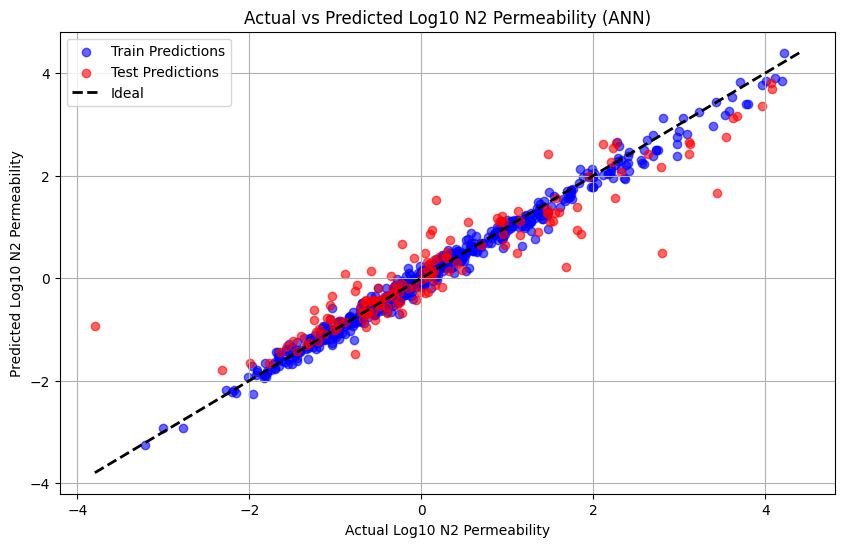

In [11]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))

# Training data plot
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.6, label='Train Predictions')

# Testing data plot
plt.scatter(y_test, y_pred_test, color='red', alpha=0.6, label='Test Predictions')

# Diagonal line for reference
max_val = max(y.max(), y_pred_train.max(), y_pred_test.max())
min_val = min(y.min(), y_pred_train.min(), y_pred_test.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Ideal')

plt.title("Actual vs Predicted Log10 N2 Permeability (ANN)")
plt.xlabel("Actual Log10 N2 Permeability")
plt.ylabel("Predicted Log10 N2 Permeability")
plt.legend()
plt.grid(True)
plt.show()